Time Series Analysis

Processing file: Benin-Malanville


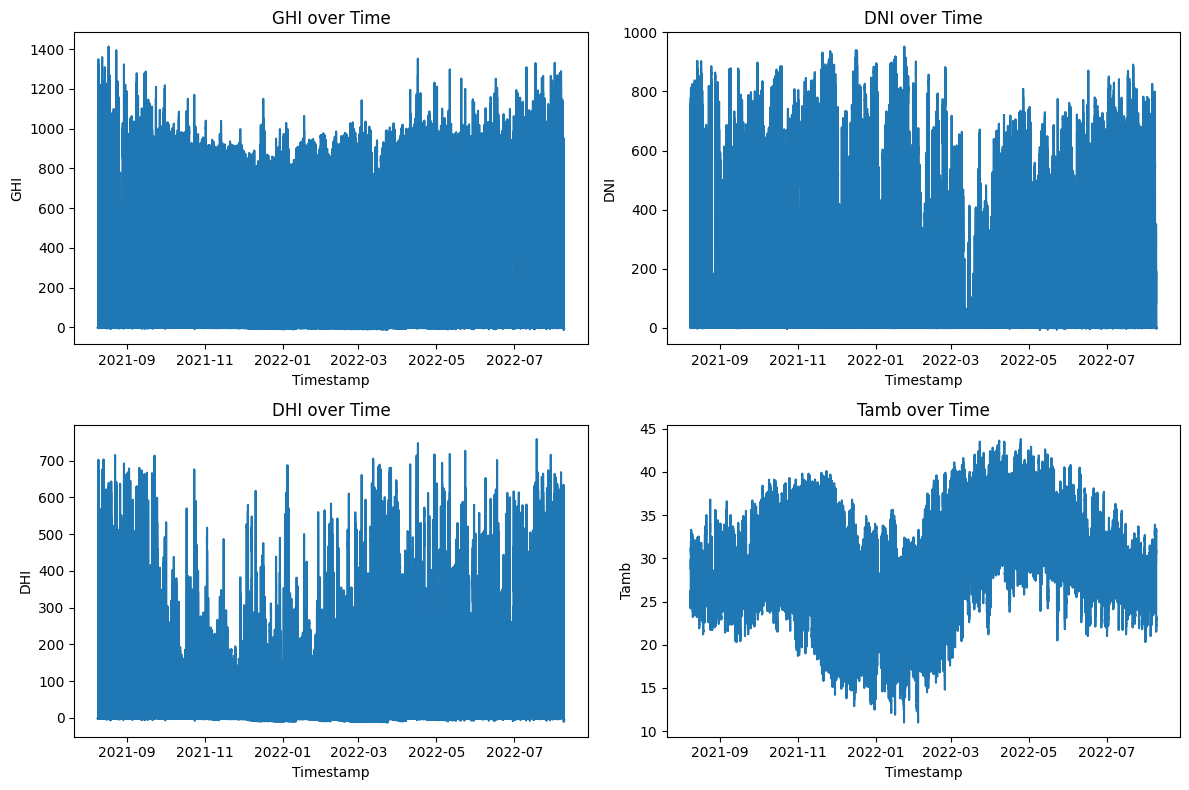


Processing file: Sierra Leone-Bumbuna


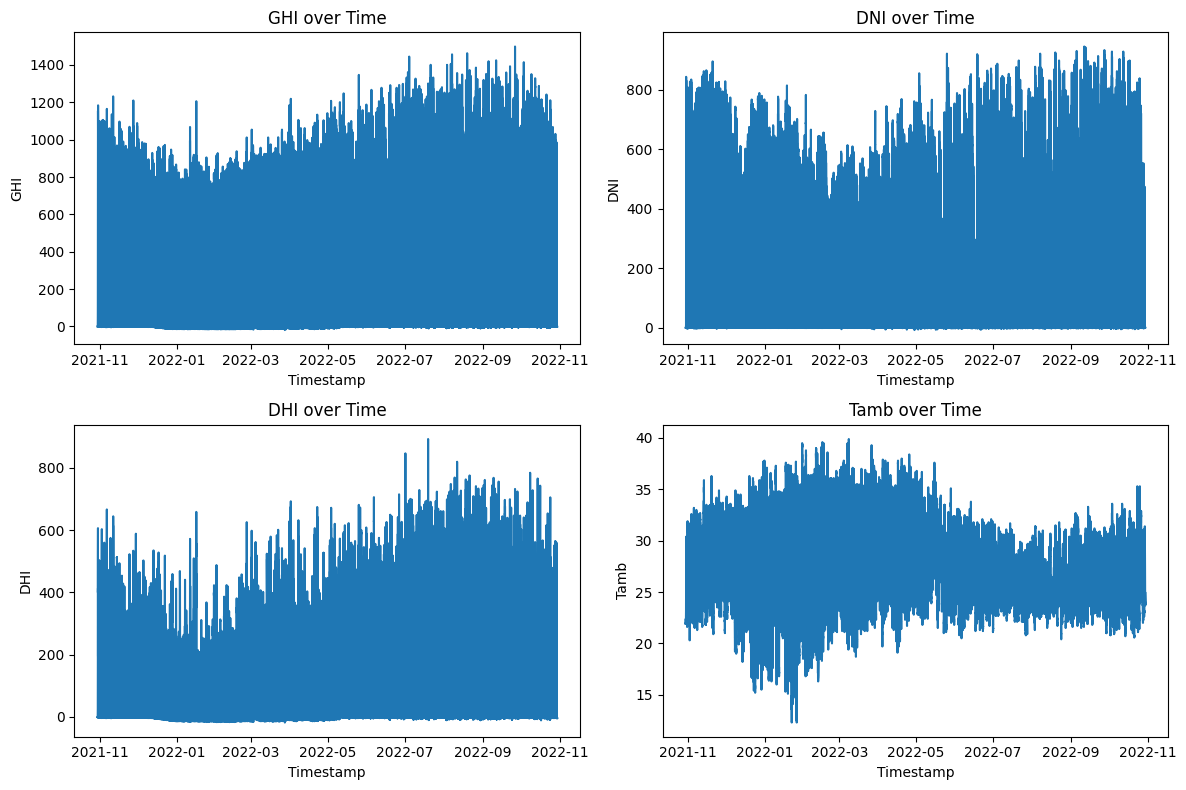


Processing file: Togo-Dapaong_QC


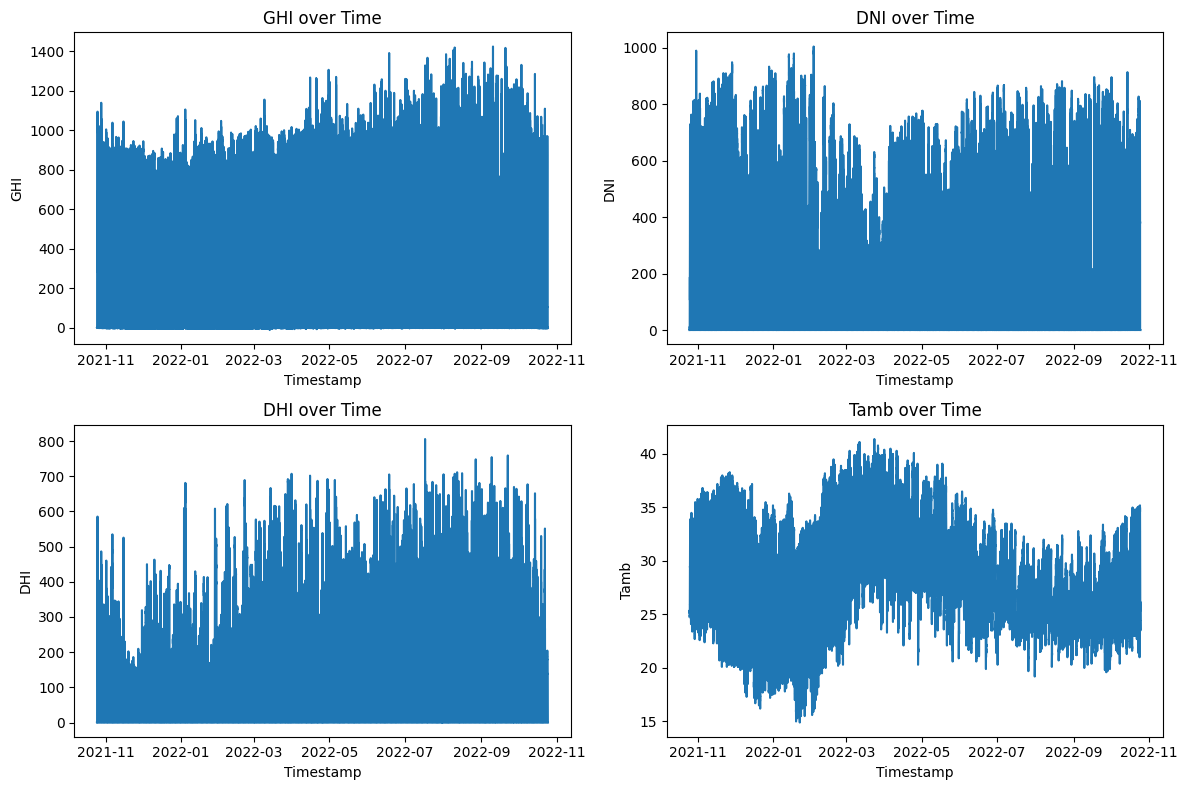

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis Class
class TimeSeriesAnalysis:
    def __init__(self, df):
        self.df = df

    def analyze(self, time_column, columns):
        self.df[time_column] = pd.to_datetime(self.df[time_column])
        
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.flatten()
        
        for ax, column in zip(axes, columns):
            sns.lineplot(x=time_column, y=column, data=self.df, ax=ax)
            ax.set_title(f'{column} over Time')
        
        plt.tight_layout()
        plt.show()

# Function to get the absolute path of the data folder
def get_data_folder_path():
    current_directory = os.getcwd()
    data_folder_path = os.path.join(current_directory, "data")
    return data_folder_path

# Time Series Analysis
def time_series_analysis():
    print("Time Series Analysis")

    # Specify file paths for the three regions directly
    data_folder_path = get_data_folder_path()
    file_paths = {
        "Benin-Malanville": os.path.join(data_folder_path, "benin-malanville.csv"),
        "Sierra Leone-Bumbuna": os.path.join(data_folder_path, "sierraleone-bumbuna.csv"),
        "Togo-Dapaong_QC": os.path.join(data_folder_path, "togo-dapaong_qc.csv")
    }

    for region, file_path in file_paths.items():
        print(f"\nProcessing file: {region}")
        try:
            data = pd.read_csv(file_path)

            if "Timestamp" in data.columns:
                # Initialize TimeSeriesAnalysis class
                ts_analysis = TimeSeriesAnalysis(data)

                # Perform time series analysis
                columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']
                ts_analysis.analyze("Timestamp", columns_to_plot)
            else:
                print(f"Timestamp column not found in the dataset for {region}.")
        except FileNotFoundError:
            print(f"File not found at path: {file_path}")

# Run the time series analysis
time_series_analysis()